# Libraries Imported

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

np.random.seed(42)
random.seed(42)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Data Loading and Data Understanding

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
#Removing '$' from price column.
df['price'] = df.price.str.lstrip('$').str.replace(',', '').astype('float')

# Exploratory Data Analysis (EDA)

# To visualize that where to invest in a property in Boston to get the maximum number of returns from Airbnb.

Neighbourhood and Average Price comparison.

In [4]:
print(df['neighbourhood_cleansed'])

0        East Boston
1            Roxbury
2            Roxbury
3        Beacon Hill
4           Downtown
            ...     
3244    South Boston
3245        Downtown
3246        Brighton
3247        Downtown
3248         Allston
Name: neighbourhood_cleansed, Length: 3249, dtype: object


In [5]:
price_per_neighbourhood = df.groupby('neighbourhood_cleansed').price.mean()

In [6]:
price_per_neighbourhood

neighbourhood_cleansed
Allston                    107.261780
Back Bay                   324.589109
Bay Village                216.372093
Beacon Hill                219.072581
Brighton                   118.399160
Charlestown                239.400000
Chinatown                  312.558140
Dorchester                 163.885321
Downtown                   285.243333
East Boston                162.610811
Fenway                     240.591304
Hyde Park                   91.540541
Jamaica Plain              170.942857
Leather District           199.000000
Longwood Medical Area      136.333333
Mattapan                   154.914286
Mission Hill               154.250000
North End                  205.741935
Roslindale                 106.883333
Roxbury                    128.177778
South Boston               209.928058
South Boston Waterfront    238.142857
South End                  225.249057
West End                   233.555556
West Roxbury               187.628571
Name: price, dtype: float64

Text(0.5, 1.0, 'Neighbourhood vs Average Price Chart')

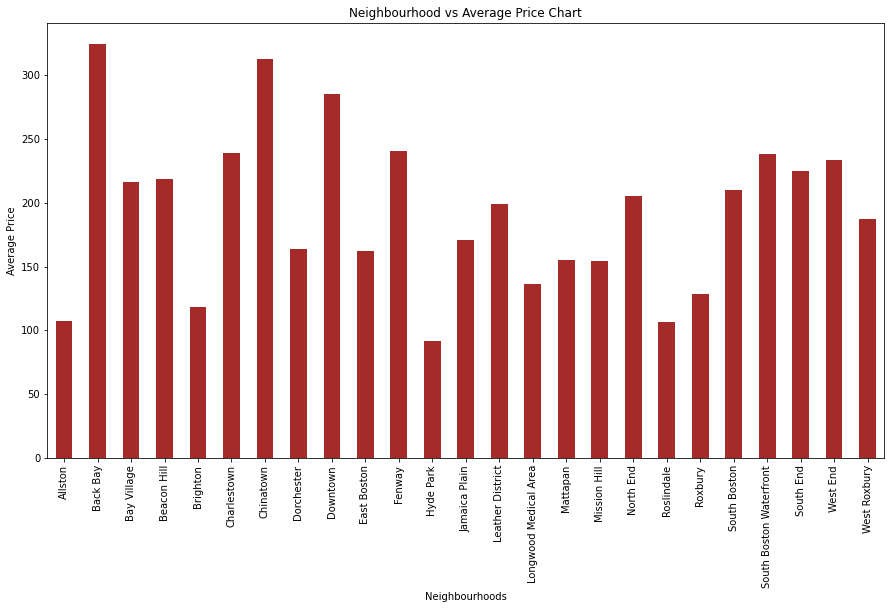

In [7]:
plt.figure(figsize=(15,8))
price_per_neighbourhood.plot(kind='bar', color='brown')
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price')
plt.title('Neighbourhood vs Average Price Chart')

Room Type and Average Price comparison.

In [8]:
print(df['room_type'])

0       Entire home/apt
1       Entire home/apt
2       Entire home/apt
3       Entire home/apt
4       Entire home/apt
             ...       
3244    Entire home/apt
3245    Entire home/apt
3246       Private room
3247       Private room
3248       Private room
Name: room_type, Length: 3249, dtype: object


In [9]:
price_per_room_type = df.groupby('room_type').price.mean()

In [10]:
price_per_room_type

room_type
Entire home/apt    246.389655
Hotel room         438.560000
Private room        97.639831
Shared room        125.285714
Name: price, dtype: float64

Text(0.5, 1.0, 'Room Type vs Average Price Chart')

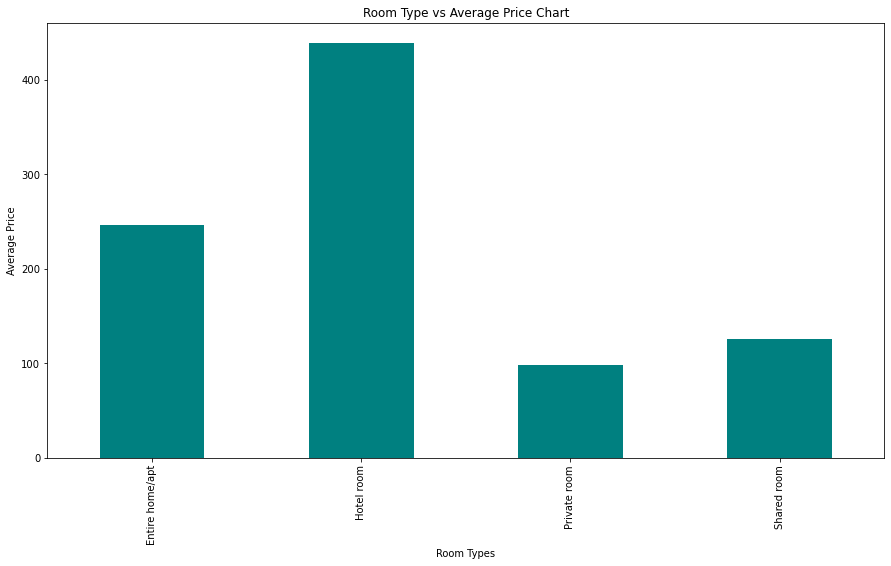

In [11]:
plt.figure(figsize=(15,8))
price_per_room_type.plot(kind='bar', color='teal')
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.title('Room Type vs Average Price Chart')

Property Type and Average Price comparison.

In [12]:
print(df['property_type'])

0                Entire rental unit
1                Entire guest suite
2        Entire condominium (condo)
3                Entire rental unit
4                Entire rental unit
                   ...             
3244     Entire condominium (condo)
3245             Entire rental unit
3246    Private room in rental unit
3247    Private room in rental unit
3248    Private room in rental unit
Name: property_type, Length: 3249, dtype: object


In [13]:
price_per_property_type = df.groupby('property_type').price.mean()

In [14]:
price_per_property_type

property_type
Boat                                   295.000000
Entire bed and breakfast               200.000000
Entire condominium (condo)             216.370370
Entire guest suite                     127.522727
Entire guesthouse                      183.600000
Entire home/apt                         75.000000
Entire loft                            193.526316
Entire place                           150.666667
Entire rental unit                     229.698546
Entire residential home                393.734375
Entire serviced apartment              282.300000
Entire townhouse                       548.588235
Houseboat                              249.500000
Private room in bed and breakfast      177.900000
Private room in bungalow                55.000000
Private room in condominium (condo)    106.845070
Private room in guest suite            106.444444
Private room in guesthouse              50.000000
Private room in loft                    69.900000
Private room in rental unit         

Text(0.5, 1.0, 'Property vs Average Price Chart')

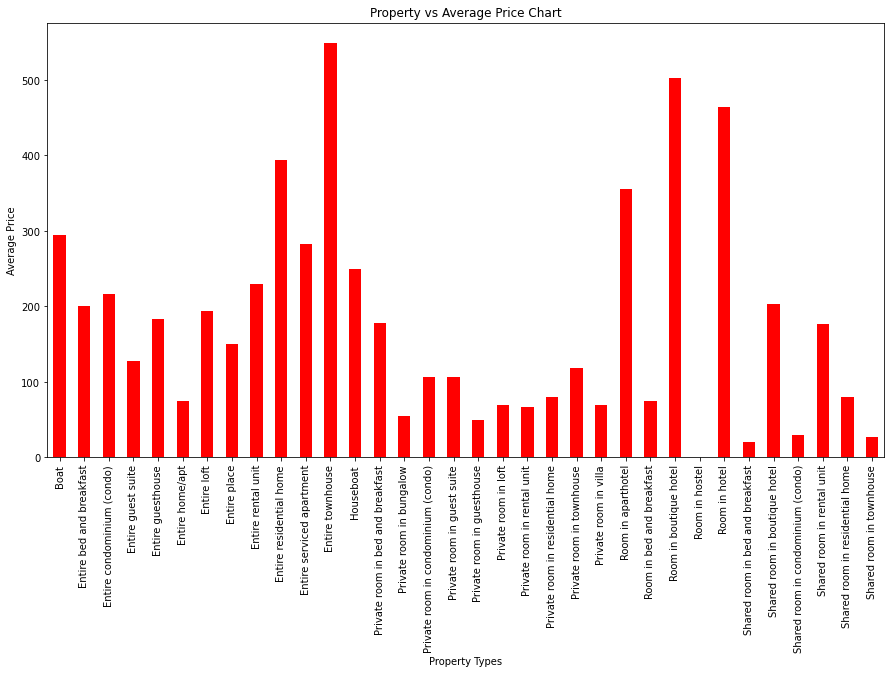

In [15]:
plt.figure(figsize=(15,8))
price_per_property_type.plot(kind='bar', color='red')
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Average Price Chart')

# To visualize that which Room Type is most and least expensive and come under which Property Type and Neighbourhood of Boston.


Visualization of Room Type Distributions.

In [16]:
room_type_count = df.room_type.value_counts()

In [17]:
room_type_count

Entire home/apt    2030
Private room       1180
Hotel room           25
Shared room          14
Name: room_type, dtype: int64

<AxesSubplot:title={'center':'Room Type Distribution'}, ylabel='room_type'>

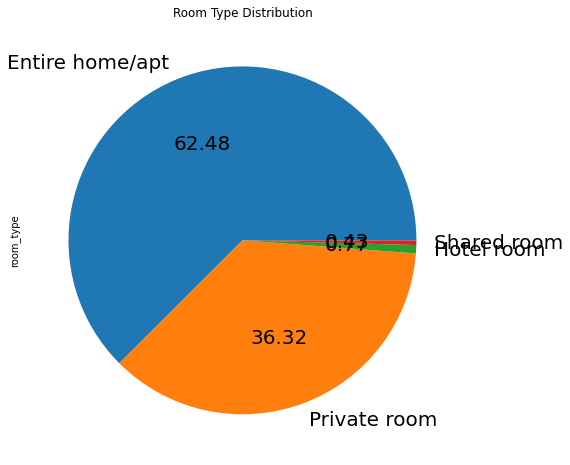

In [18]:
#Pie Chart.
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution')

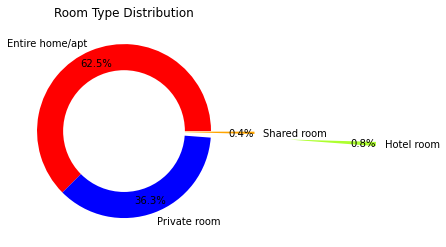

In [19]:
#Donut Chart.
room_type_labels = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
room_type_counts_labels = [2030, 1180, 25, 14]

colors = ['#FF0000', '#0000FF', '#ADFF2F', '#FFA500']
explode = (0, 0, 1.9, 0.5)
plt.pie(room_type_counts_labels, colors=colors, labels= room_type_labels, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Room Type Distribution')
plt.show()

Property Type and Room Type compared with Price.

In [20]:
df.property_type.unique()

array(['Entire rental unit', 'Entire guest suite',
       'Entire condominium (condo)', 'Entire home/apt',
       'Private room in rental unit', 'Private room in residential home',
       'Entire residential home', 'Private room in townhouse',
       'Entire townhouse', 'Boat', 'Private room in condominium (condo)',
       'Entire loft', 'Private room in bed and breakfast',
       'Entire bed and breakfast', 'Shared room in residential home',
       'Private room in villa', 'Shared room in rental unit',
       'Entire guesthouse', 'Private room in loft',
       'Private room in guest suite', 'Private room in bungalow',
       'Shared room in condominium (condo)', 'Entire serviced apartment',
       'Entire place', 'Room in bed and breakfast', 'Room in hotel',
       'Private room in guesthouse', 'Room in boutique hotel',
       'Houseboat', 'Shared room in townhouse',
       'Shared room in bed and breakfast', 'Room in hostel',
       'Shared room in boutique hotel', 'Room in aparthote

In [21]:
df = df[df.property_type != 0]

In [22]:
property_type_count = df.property_type.value_counts()

In [23]:
property_type_count

Entire rental unit                     1307
Private room in rental unit             578
Private room in residential home        377
Entire condominium (condo)              270
Entire serviced apartment               210
Entire residential home                 128
Private room in condominium (condo)      71
Entire guest suite                       44
Room in boutique hotel                   43
Private room in townhouse                39
Entire townhouse                         34
Room in hotel                            32
Private room in bed and breakfast        30
Entire loft                              19
Private room in guest suite              18
Private room in loft                     10
Shared room in rental unit                7
Boat                                      6
Entire guesthouse                         5
Shared room in residential home           3
Entire place                              3
Houseboat                                 2
Private room in bungalow        

Text(0, 0.5, 'Number of listings')

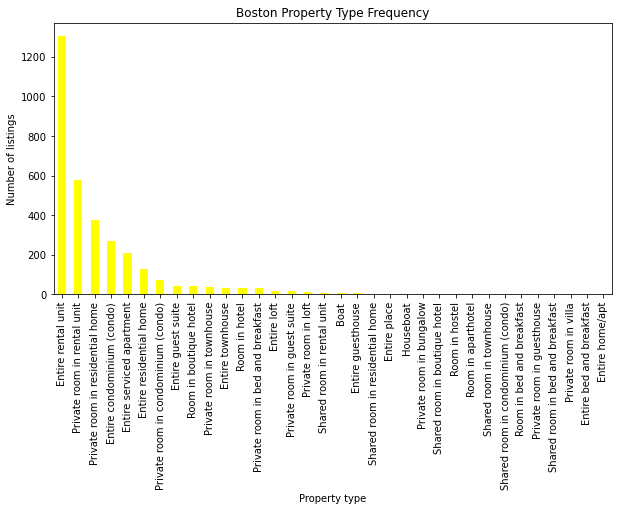

In [24]:
property_type_count.plot.bar(color = 'yellow', figsize =(10,5), title = 'Boston Property Type Frequency')
plt.xlabel('Property type')
plt.ylabel('Number of listings')

In [25]:
prices_data = df.groupby(['property_type','room_type']).price.mean()

In [26]:
prices_data

property_type                        room_type      
Boat                                 Entire home/apt    295.000000
Entire bed and breakfast             Entire home/apt    200.000000
Entire condominium (condo)           Entire home/apt    216.370370
Entire guest suite                   Entire home/apt    127.522727
Entire guesthouse                    Entire home/apt    183.600000
Entire home/apt                      Entire home/apt     75.000000
Entire loft                          Entire home/apt    193.526316
Entire place                         Entire home/apt    150.666667
Entire rental unit                   Entire home/apt    229.698546
Entire residential home              Entire home/apt    393.734375
Entire serviced apartment            Entire home/apt    282.300000
Entire townhouse                     Entire home/apt    548.588235
Houseboat                            Entire home/apt    249.500000
Private room in bed and breakfast    Private room       177.900000
Private r

Text(0.5, 1.0, 'Heatmap between Property Type and Room Type')

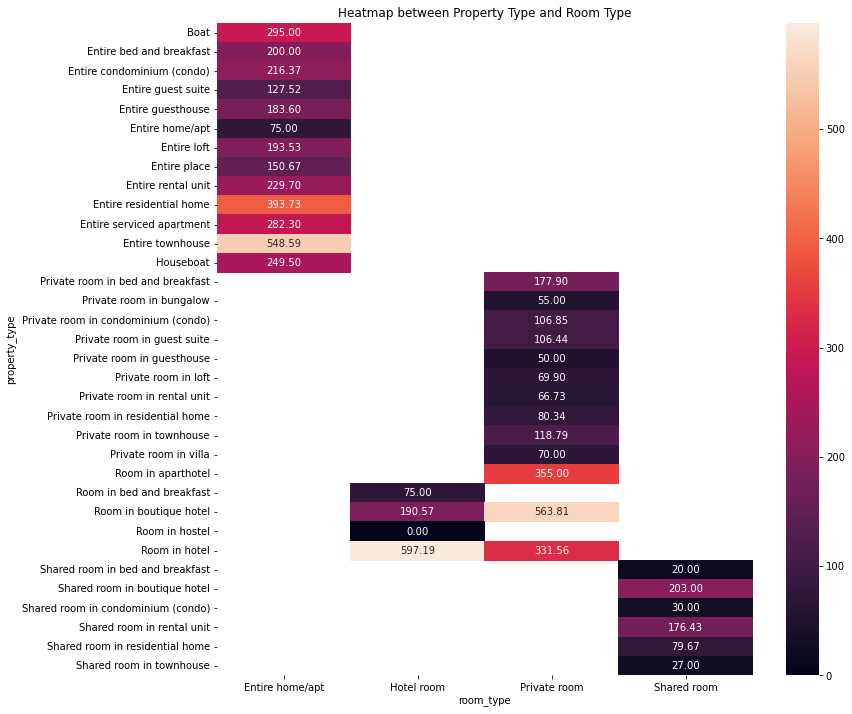

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(df.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")
plt.title('Heatmap between Property Type and Room Type')

Neighbourhood Cleansed and Room Type compared with Price.

In [28]:
df.groupby(['neighbourhood_cleansed','room_type']).price.mean()

neighbourhood_cleansed  room_type      
Allston                 Entire home/apt    211.419355
                        Private room        57.414062
                        Shared room         30.000000
Back Bay                Entire home/apt    323.273743
                        Hotel room         265.625000
                                              ...    
West End                Entire home/apt    240.827586
                        Private room       203.428571
West Roxbury            Entire home/apt    203.533333
                        Private room       182.368421
                        Shared room         49.000000
Name: price, Length: 65, dtype: float64

Text(0.5, 1.0, 'Heatmap between Neighbourhood Cleansed and Room Type')

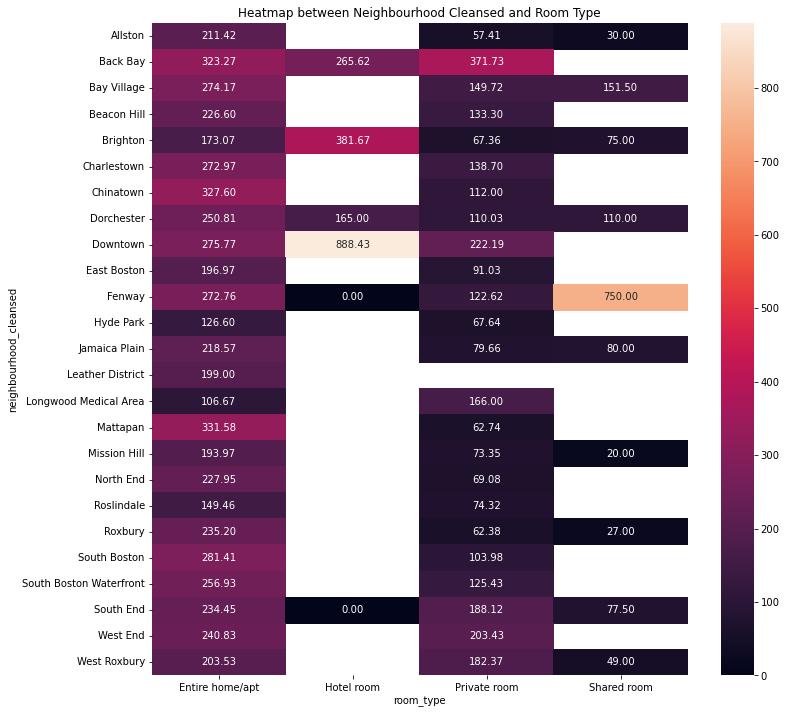

In [29]:
plt.figure(figsize=(12,12));
sns.heatmap(df.groupby(['neighbourhood_cleansed', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")
plt.title('Heatmap between Neighbourhood Cleansed and Room Type')

# To visualize that which listing id has good and bad Review Score Ratings on the basis of Neighbourhood, Property Type, Room Type and Bedrooms available in the individuals.


In [30]:
df.review_scores_rating.unique()

array([4.95, 4.78, 4.8 , 4.64, 5.  , 0.  ,  nan, 4.3 , 4.47, 4.96, 4.98,
       4.63, 4.45, 4.73, 4.83, 4.75, 4.29, 4.41, 4.66, 4.38, 4.79, 4.54,
       4.86, 4.87, 4.91, 4.36, 4.39, 4.81, 4.93, 4.49, 4.4 , 4.56, 4.26,
       4.85, 4.9 , 4.84, 4.82, 4.62, 3.29, 4.48, 4.68, 4.43, 4.76, 4.88,
       4.51, 4.25, 4.67, 4.46, 4.13, 4.92, 4.71, 4.69, 4.89, 4.7 , 4.61,
       4.  , 4.72, 4.31, 4.77, 4.34, 4.6 , 4.08, 4.5 , 4.28, 4.65, 4.44,
       4.33, 4.94, 4.58, 4.1 , 4.2 , 4.37, 4.97, 4.52, 4.42, 3.5 , 4.07,
       4.57, 4.74, 2.5 , 4.53, 4.55, 4.99, 4.59, 4.02, 4.18, 4.27, 4.21,
       4.17, 3.67, 3.75, 3.56, 4.22, 4.14, 1.  , 4.23, 4.19, 3.  , 3.86,
       4.35, 3.33, 4.24, 4.32, 3.78, 3.17, 2.33, 2.  , 4.05, 4.04, 2.67,
       1.5 , 3.63, 4.15, 3.4 , 3.85, 3.6 , 3.83, 3.71])

In [31]:
df[['review_scores_rating']] = df[['review_scores_rating']].fillna(value=0)

Review Scores Rating validate with Neighbourhood Cleansed.

In [32]:
ratings_per_neighbourhood = df.groupby(['neighbourhood_cleansed', 'property_type']).review_scores_rating.mean()

In [33]:
ratings_per_neighbourhood.sort_values(ascending=False)

neighbourhood_cleansed  property_type                      
Dorchester              Shared room in residential home        5.0
Back Bay                Entire residential home                5.0
Downtown                Entire guest suite                     5.0
Beacon Hill             Entire townhouse                       5.0
West Roxbury            Private room in bed and breakfast      5.0
                                                              ... 
Longwood Medical Area   Entire condominium (condo)             0.0
Jamaica Plain           Shared room in residential home        0.0
Bay Village             Shared room in rental unit             0.0
Fenway                  Private room in condominium (condo)    0.0
Brighton                Entire serviced apartment              0.0
Name: review_scores_rating, Length: 246, dtype: float64

Text(0.5, 1.0, 'Reviews based on neighbourhood and price')

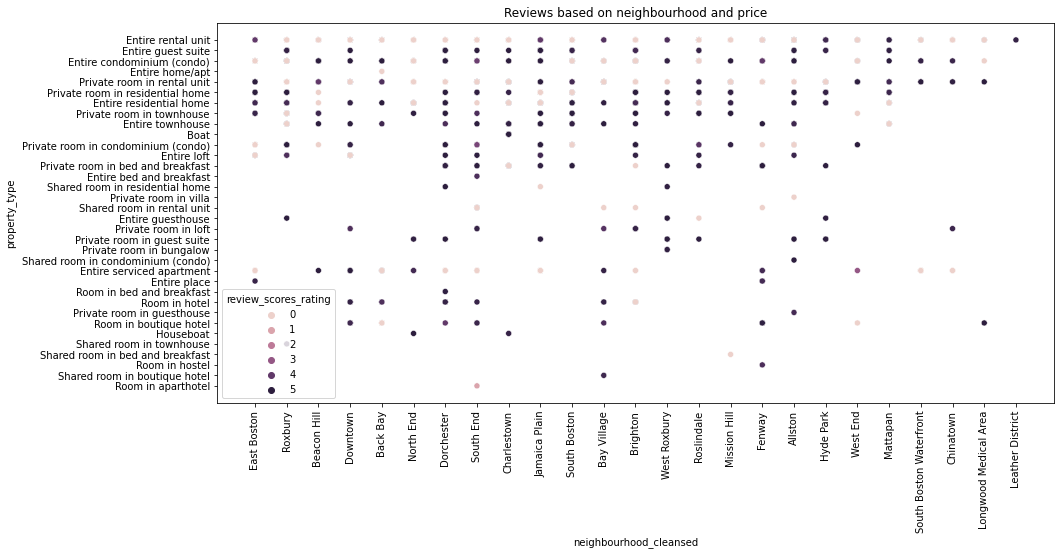

In [34]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='neighbourhood_cleansed', y='property_type', hue='review_scores_rating', data=df)
plt.xticks(rotation=90)
plt.title('Reviews based on neighbourhood and price')

Review Scores Rating validate with Property Type.

In [35]:
ratings_per_property_type = df.groupby('property_type').review_scores_rating.mean()

In [36]:
ratings_per_property_type

property_type
Boat                                   4.911667
Entire bed and breakfast               4.340000
Entire condominium (condo)             3.575667
Entire guest suite                     4.841591
Entire guesthouse                      3.962000
Entire home/apt                        0.000000
Entire loft                            4.317895
Entire place                           4.746667
Entire rental unit                     3.425593
Entire residential home                4.252031
Entire serviced apartment              1.298000
Entire townhouse                       4.403235
Houseboat                              4.895000
Private room in bed and breakfast      4.547667
Private room in bungalow               4.915000
Private room in condominium (condo)    3.869155
Private room in guest suite            4.027778
Private room in guesthouse             4.500000
Private room in loft                   4.159000
Private room in rental unit            2.692422
Private room in residentia

Text(0.5, 1.0, 'Property Type vs Average Rating Chart')

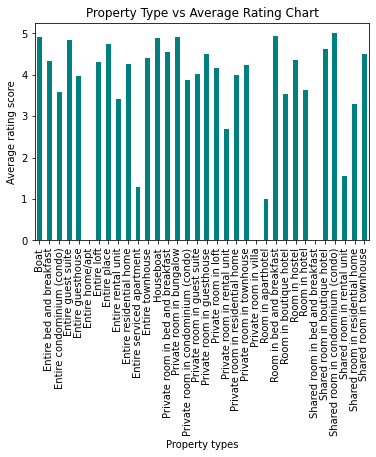

In [37]:
ratings_per_property_type.plot(kind='bar',color='teal')
plt.xlabel('Property types')
plt.ylabel('Average rating score')
plt.title('Property Type vs Average Rating Chart')

Review Scores Rating validate Room Type and Bedrooms.

In [38]:
ratings_per_bedrooms = df.groupby(['room_type', 'bedrooms']).review_scores_rating.mean()

In [39]:
ratings_per_bedrooms

room_type        bedrooms
Entire home/apt  1.0         3.207761
                 2.0         3.348980
                 3.0         4.007614
                 4.0         3.900667
                 5.0         3.668636
                 6.0         4.514000
                 7.0         5.000000
                 13.0        5.000000
Hotel room       1.0         3.719500
Private room     1.0         3.326278
                 2.0         3.921250
                 3.0         4.648000
                 4.0         4.530000
                 5.0         4.840000
Shared room      1.0         2.494286
Name: review_scores_rating, dtype: float64

Text(0.5, 1.0, 'Room_type, Bedrooms vs Average Rating Chart')

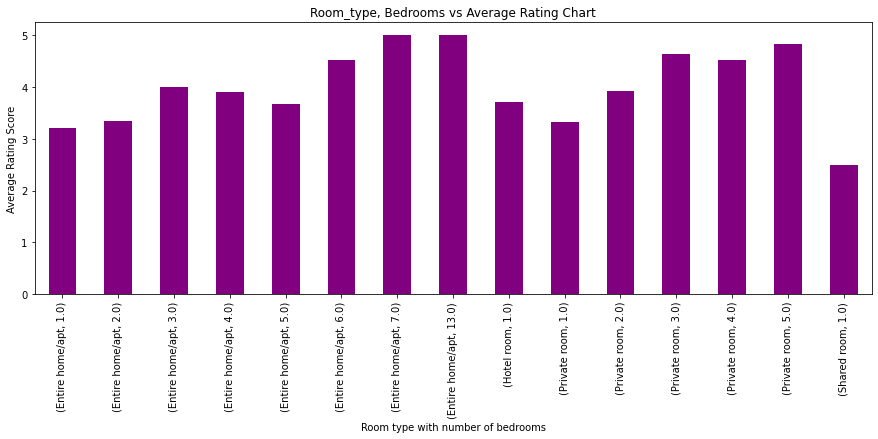

In [40]:
plt.figure(figsize=(15, 5))
ratings_per_bedrooms.plot(kind='bar',color='purple')
plt.xlabel('Room type with number of bedrooms')
plt.ylabel('Average Rating Score')
plt.title('Room_type, Bedrooms vs Average Rating Chart')

# Data Pre-Processing

# Data Cleaning, Feature Engineering, Data Reduction, Data Transformation and EDA

# To predict and validate the price using different algorithms.

In [41]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20211019170555,2021-10-19,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,...,4.95,4.86,4.90,NaN,f,1,1,0,0,0.29
1,5506,https://www.airbnb.com/rooms/5506,20211019170555,2021-10-19,** Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,https://www.airbnb.com/users/show/8229,...,4.89,4.53,4.78,Approved by the government,f,10,10,0,0,0.90
2,6695,https://www.airbnb.com/rooms/6695,20211019170555,2021-10-19,Home Away from Home! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,...,4.95,4.48,4.70,STR446650,f,10,10,0,0,1.33
3,8789,https://www.airbnb.com/rooms/8789,20211019170555,2021-10-19,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/32210/7fdd2fd...,26988,https://www.airbnb.com/users/show/26988,...,4.96,4.96,4.56,NaN,f,6,6,0,0,0.30
4,10730,https://www.airbnb.com/rooms/10730,20211019170555,2021-10-19,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Beacon Hill is located downtown and is conveni...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,https://www.airbnb.com/users/show/26988,...,4.92,4.96,4.43,NaN,f,6,6,0,0,0.40


In [42]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [43]:
df.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               915
Length: 74, dtype: int64

In [44]:
df.isnull().sum().sum()

26401

In [45]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.249000e+03,3.249000e+03,3.249000e+03,3249.000000,3249.000000,0.0,3249.000000,3249.000000,3249.000000,0.0,...,2322.000000,2320.000000,2322.000000,2320.000000,2320.000000,3249.000000,3249.000000,3249.000000,3249.000000,2334.000000
mean,3.273326e+07,2.021102e+13,1.282167e+08,204.217605,204.217605,NaN,42.337907,-71.082905,3.057556,NaN,...,4.710125,4.828819,4.806288,4.748780,4.613569,30.005232,19.217913,10.715297,0.016313,3.018993
std,1.658979e+07,0.000000e+00,1.299268e+08,556.985150,556.985150,NaN,0.026069,0.032811,2.159741,NaN,...,0.438382,0.397861,0.420304,0.373094,0.454144,51.530017,42.889054,33.559317,0.153104,7.800909
min,3.781000e+03,2.021102e+13,4.804000e+03,0.000000,0.000000,NaN,42.235330,-71.172520,0.000000,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.879002e+07,2.021102e+13,1.820209e+07,1.000000,1.000000,NaN,42.323000,-71.101820,2.000000,NaN,...,4.630000,4.830000,4.800000,4.670000,4.500000,1.000000,1.000000,0.000000,0.000000,0.290000
50%,3.676633e+07,2.021102e+13,8.057069e+07,5.000000,5.000000,NaN,42.344480,-71.072980,2.000000,NaN,...,4.845000,4.950000,4.940000,4.870000,4.720000,6.000000,2.000000,0.000000,0.000000,1.160000
75%,4.824659e+07,2.021102e+13,2.439311e+08,30.000000,30.000000,NaN,42.354500,-71.061370,4.000000,NaN,...,4.990000,5.000000,5.000000,5.000000,4.872500,28.000000,14.000000,4.000000,0.000000,3.090000
max,5.287321e+07,2.021102e+13,4.243073e+08,2232.000000,2232.000000,NaN,42.392790,-70.997810,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,182.000000,182.000000,155.000000,3.000000,179.210000


In [46]:
df = df.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'bathrooms',
       'bathrooms_text', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'])

In [47]:
df

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews
0,3781,42.364130,-71.029910,Entire home/apt,2,1.0,125.0,21
1,5506,42.328440,-71.095810,Entire home/apt,2,1.0,124.0,109
2,6695,42.328020,-71.093870,Entire home/apt,4,NaN,164.0,116
3,8789,42.358670,-71.063070,Entire home/apt,2,1.0,110.0,25
4,10730,42.359060,-71.062710,Entire home/apt,2,1.0,100.0,32
...,...,...,...,...,...,...,...,...
3244,52856176,42.333945,-71.048292,Entire home/apt,4,2.0,220.0,0
3245,52863673,42.357621,-71.061692,Entire home/apt,2,NaN,211.0,0
3246,52872248,42.354557,-71.144149,Private room,1,1.0,55.0,0
3247,52872801,42.359005,-71.058203,Private room,1,1.0,55.0,0


In [48]:
df.isnull().sum()

id                     0
latitude               0
longitude              0
room_type              0
accommodates           0
bedrooms             451
price                  0
number_of_reviews      0
dtype: int64

In [49]:
df.isnull().sum().sum()

451

In [50]:
df[['bedrooms']] = df[['bedrooms']].fillna(value=0)

In [51]:
df

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews
0,3781,42.364130,-71.029910,Entire home/apt,2,1.0,125.0,21
1,5506,42.328440,-71.095810,Entire home/apt,2,1.0,124.0,109
2,6695,42.328020,-71.093870,Entire home/apt,4,0.0,164.0,116
3,8789,42.358670,-71.063070,Entire home/apt,2,1.0,110.0,25
4,10730,42.359060,-71.062710,Entire home/apt,2,1.0,100.0,32
...,...,...,...,...,...,...,...,...
3244,52856176,42.333945,-71.048292,Entire home/apt,4,2.0,220.0,0
3245,52863673,42.357621,-71.061692,Entire home/apt,2,0.0,211.0,0
3246,52872248,42.354557,-71.144149,Private room,1,1.0,55.0,0
3247,52872801,42.359005,-71.058203,Private room,1,1.0,55.0,0


Text(0.5, 1.0, 'Price Frequency')

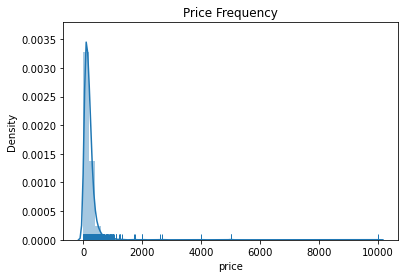

In [52]:
sns.distplot(df['price'], rug = True)
plt.title('Price Frequency')

In [53]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [54]:
df.room_type.value_counts()

Entire home/apt    2030
Private room       1180
Hotel room           25
Shared room          14
Name: room_type, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='room_type'>

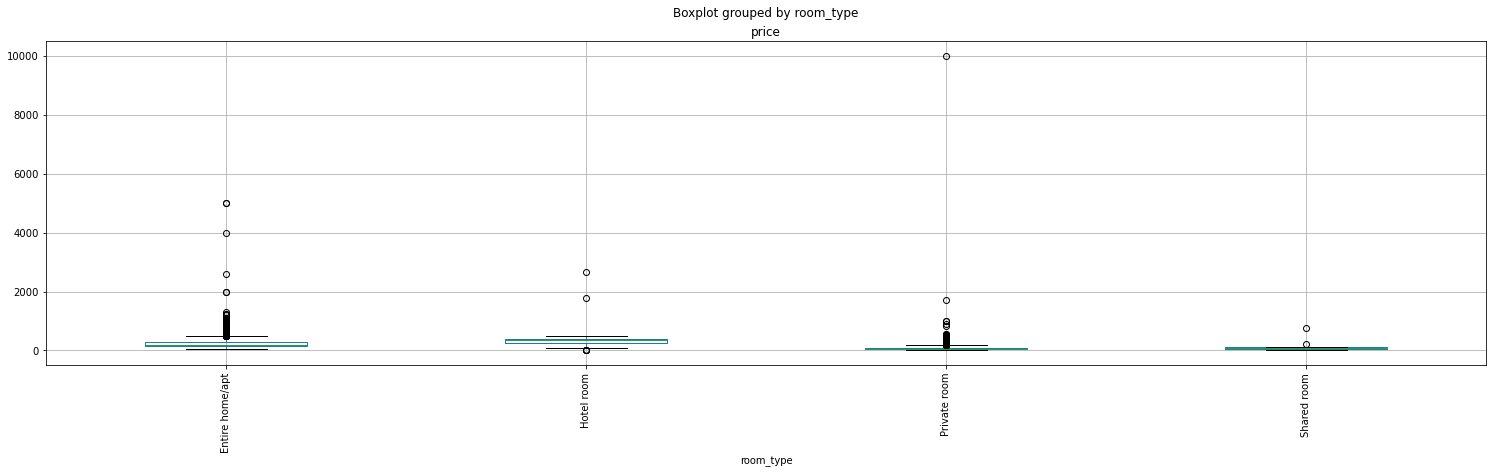

In [55]:
df.boxplot(column='price', by = 'room_type', figsize=(25,6), rot = 90)

Text(0.5, 1.0, 'Longitude & Latitude along with Price')

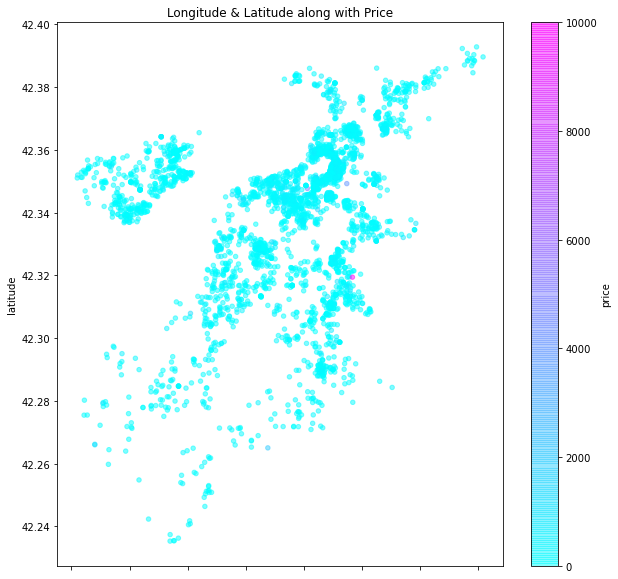

In [56]:
df.plot.scatter(x = 'longitude' , y = 'latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)
plt.title('Longitude & Latitude along with Price')

Text(0.5, 1.0, 'Longitude and Latitude along with Price < 200')

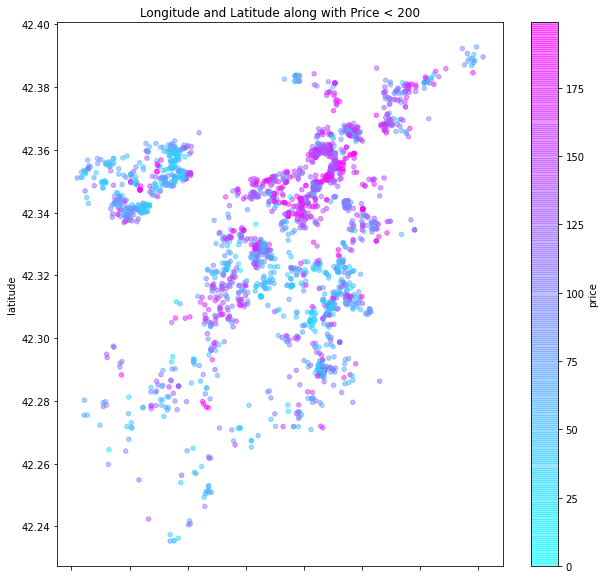

In [57]:
df[df['price']<200].plot.scatter(x = 'longitude' , y = 'latitude', c = 'price', figsize=(10,10), cmap='cool', alpha=0.5)
plt.title('Longitude and Latitude along with Price < 200')

In [58]:
import folium
from folium import plugins
from folium.plugins import HeatMap

US = folium.Map(location=[54.5260, -105.2551], zoom_start = 3)
heat_data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(US)
US

Text(0.5, 1.0, 'Price vs Number of Reviews')

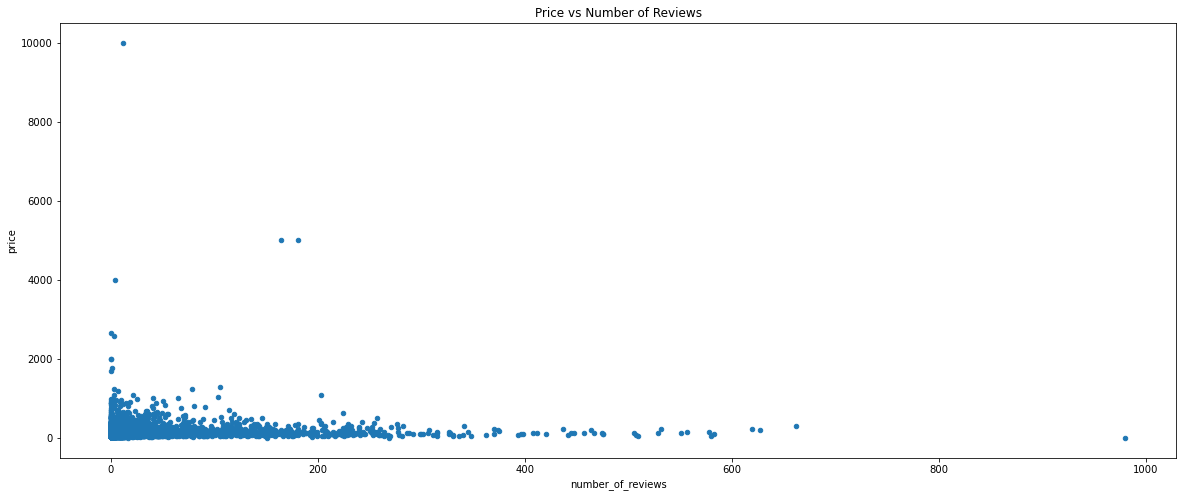

In [59]:
df.plot.scatter(x = 'number_of_reviews', y = 'price', figsize=(20,8))
plt.title('Price vs Number of Reviews')

Text(0.5, 1.0, 'Price vs log(reviews)')

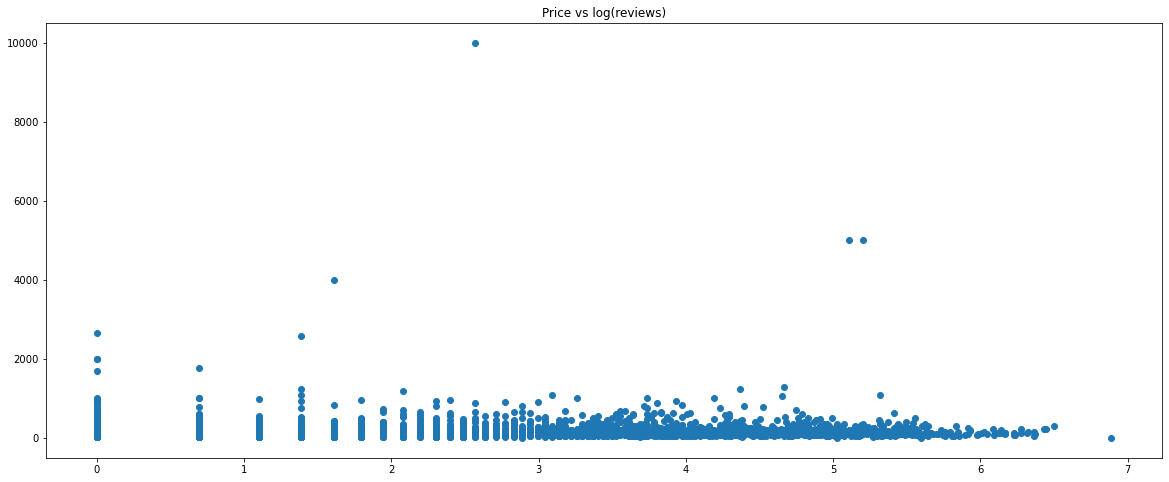

In [60]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+df['number_of_reviews']), df['price'])
plt.title('Price vs log(reviews)')

Text(0.5, 1.0, 'Price vs Bedrooms')

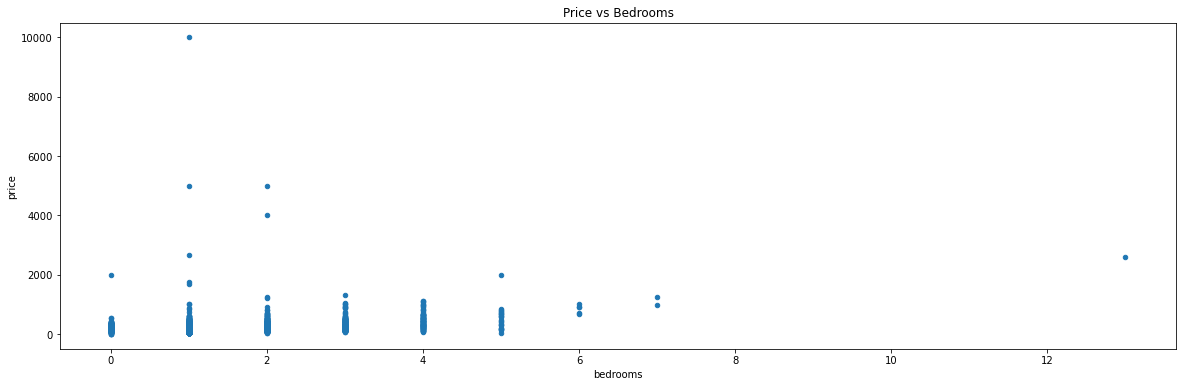

In [61]:
df.plot.scatter(x = 'bedrooms', y = 'price', figsize=(20,6))
plt.title('Price vs Bedrooms') 

Text(0.5, 1.0, 'Price vs Accomodates')

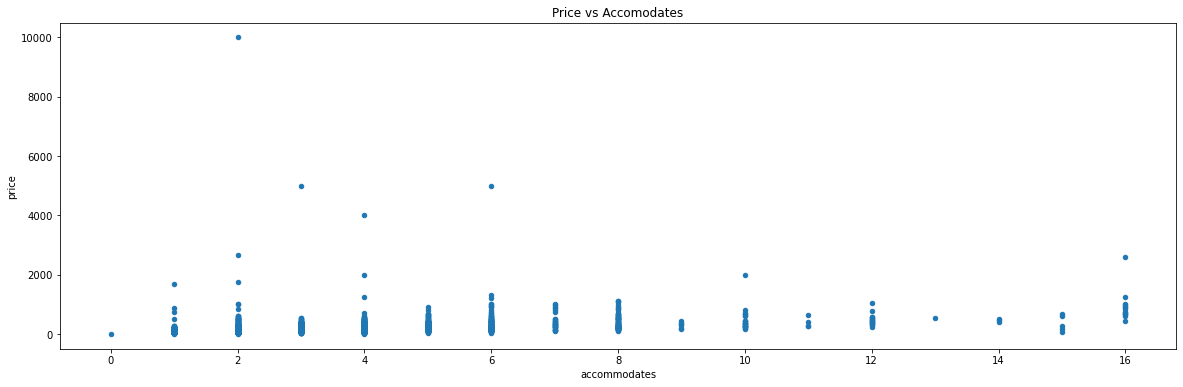

In [62]:
df.plot.scatter(x = 'accommodates', y = 'price', figsize=(20,6))
plt.title('Price vs Accomodates') 

In [63]:
df['logreviews'] = np.log(1 + df['number_of_reviews'])

In [64]:
df.head()

,id,latitude,longitude,room_type,accommodates,bedrooms,price,number_of_reviews,logreviews
0,3781,42.36413,-71.02991,Entire home/apt,2,1.0,125.0,21,3.091042
1,5506,42.32844,-71.09581,Entire home/apt,2,1.0,124.0,109,4.700480
2,6695,42.32802,-71.09387,Entire home/apt,4,0.0,164.0,116,4.762174
3,8789,42.35867,-71.06307,Entire home/apt,2,1.0,110.0,25,3.258097
4,10730,42.35906,-71.06271,Entire home/apt,2,1.0,100.0,32,3.496508


In [65]:
df.columns

Index(['id', 'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms',
       'price', 'number_of_reviews', 'logreviews'],
      dtype='object')

Text(0.5, 1.0, 'Correlogram between Features')

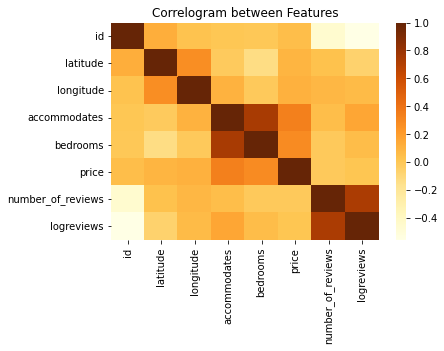

In [66]:
corr1=df.corr()
sns.heatmap(corr1, cmap="YlOrBr")
plt.title('Correlogram between Features')

Text(0.5, 1.0, 'Correlation between Features')

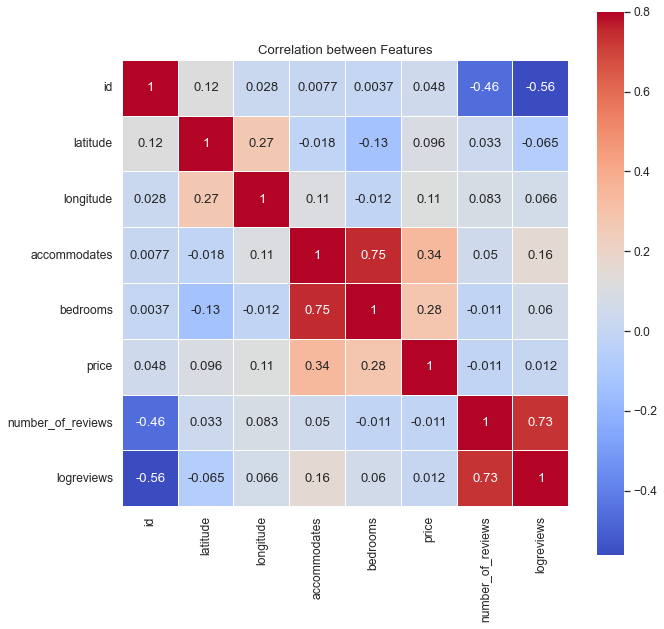

In [67]:
corrMatrix=df[['id', 'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms', 'price', 'number_of_reviews', 'logreviews']].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='coolwarm',linecolor="white")
plt.title('Correlation between Features')

In [68]:
data = df.copy()
print('amount of original data:' + str(len(data)))

amount of original data:3249


In [69]:
data = pd.get_dummies(data)
data.head()

,id,latitude,longitude,accommodates,bedrooms,price,number_of_reviews,logreviews,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,3781,42.36413,-71.02991,2,1.0,125.0,21,3.091042,1,0,0,0
1,5506,42.32844,-71.09581,2,1.0,124.0,109,4.700480,1,0,0,0
2,6695,42.32802,-71.09387,4,0.0,164.0,116,4.762174,1,0,0,0
3,8789,42.35867,-71.06307,2,1.0,110.0,25,3.258097,1,0,0,0
4,10730,42.35906,-71.06271,2,1.0,100.0,32,3.496508,1,0,0,0


In [70]:
data.columns

Index(['id', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'price',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [71]:
X = data[['id', 'accommodates', 'bedrooms', 'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
          'room_type_Hotel room', 'room_type_Private room',
          'room_type_Shared room']]
y = data['price']

# Multi-Linear Regression 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2599, 9), (650, 9), (2599,), (650,))

In [74]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
print('Intercept: ', regressor.intercept_)
print('Coefficients: ', regressor.coef_)
print(regressor)

Intercept:  124.52214953030727
Coefficients:  [ 7.05498778e-07  2.43503076e+01  3.56766866e+01 -3.71957978e-02
 -1.46680619e+00 -4.29566376e+01  2.22683260e+02 -1.21777067e+02
 -5.79495552e+01]
LinearRegression()


In [76]:
y_pred = regressor.predict(X_test)

In [77]:
y_pred

array([158.93951763, 212.50123855, 275.72636075, 252.6376086 ,
       202.32735483, 142.95774507, 124.23526196,  98.75042481,
       150.97372981, 381.29189911,  66.55653524, 202.44811153,
       197.70702948, 108.92196924,  66.06365761, 330.75111557,
       112.23228166, 122.12548973,  66.74408499, 109.87043065,
        87.91787166, 163.26190465, 212.70621229, 243.80575322,
       155.07643861, 250.22765366, 259.07694992, 189.95101803,
       173.89515864, 224.44802399, 311.28846534, 285.0228146 ,
       200.64555651, 228.06147663,  58.97078055,  59.2838197 ,
       410.49122363, 194.48523854, 150.78282716,  80.00292378,
       227.55770446, 188.66332795, 192.67443094, 120.66888764,
       139.9991487 ,  92.38116599,  81.15559505, 201.61493229,
       221.51993938, 241.33579471,  98.35086558, 306.9826398 ,
        49.12018393,  90.96844947,  74.24891762,  59.05775754,
       343.02114744, 115.38826853, 341.08126811, 117.59582491,
       166.74444222,  99.6672106 , 226.84306876,  83.97

In [78]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
2396,231.0,158.939518
1735,118.0,212.501239
2005,128.0,275.726361
321,150.0,252.637609
2928,196.0,202.327355
...,...,...
472,110.0,249.224616
765,615.0,590.596889
1726,192.0,321.244884
2471,163.0,218.051791


In [79]:
#Accuracy of the model.
r2_score(y_test, y_pred)

0.1286429170181207

In [80]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 87.70367357433618
Mean Squared Error: 72832.59305368164
Root Mean Squared Error: 269.8751434528227


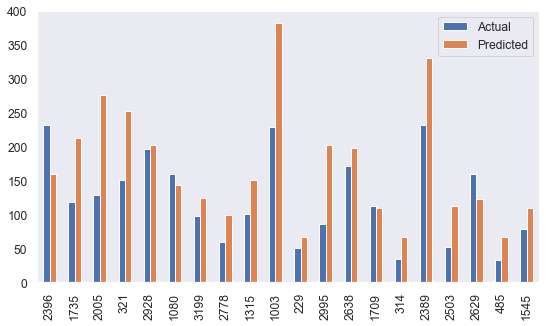

In [81]:
#first20pred
df2 = df1.head(20)
df2.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

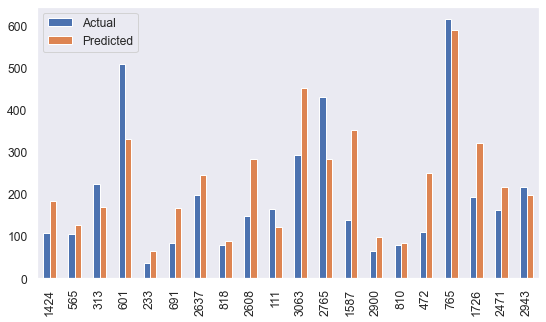

In [82]:
#last20pred
df2 = df1.tail(20)
df2.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# K-Nearest Neighbor Classification

In [83]:
conditions = [
    (data['price'] < 100.0),
    (data['price'] >= 100.0) & (data['price'] < 250.0),
    (data['price'] >= 250.0) & (data['price'] < 600.0),
    (data['price'] >= 600.0) ]

values = ['economic', 'low-mid', 'high-mid','high']

data['price_range'] = np.select(conditions, values)

In [84]:
data['price_range'].value_counts()

low-mid     1436
economic    1082
high-mid     648
high          83
Name: price_range, dtype: int64

In [85]:
labelencoder = LabelEncoder()
data['price_range_category'] = labelencoder.fit_transform(data['price_range'])

In [86]:
df3 = data[['id', 'accommodates', 'bedrooms', 'price', 'price_range_category',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']]

In [87]:
df3.corr().style.background_gradient(cmap='magma')

,id,accommodates,bedrooms,price,price_range_category,number_of_reviews,logreviews,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,1.000000,0.007737,0.003700,0.048366,0.026569,-0.457435,-0.561835,0.043411,0.007198,-0.044992,-0.000154
accommodates,0.007737,1.000000,0.749521,0.337762,0.265766,0.049834,0.158352,0.454283,-0.028446,-0.445133,-0.051802
bedrooms,0.003700,0.749521,1.000000,0.281850,0.048938,-0.011486,0.060346,0.205220,-0.042072,-0.196546,-0.017758
price,0.048366,0.337762,0.281850,1.000000,0.139053,-0.010669,0.012081,0.245487,0.077413,-0.259029,-0.016044
price_range_category,0.026569,0.265766,0.048938,0.139053,1.000000,0.084568,0.100500,0.648065,-0.010047,-0.645038,-0.041017
number_of_reviews,-0.457435,0.049834,-0.011486,-0.010669,0.084568,1.000000,0.733022,0.008787,0.072010,-0.020797,-0.008317
logreviews,-0.561835,0.158352,0.060346,0.012081,0.100500,0.733022,1.000000,0.038325,0.038877,-0.041370,-0.031409
room_type_Entire home/apt,0.043411,0.454283,0.205220,0.245487,0.648065,0.008787,0.038325,1.000000,-0.113637,-0.974556,-0.084893
room_type_Hotel room,0.007198,-0.028446,-0.042072,0.077413,-0.010047,0.072010,0.038877,-0.113637,1.000000,-0.066502,-0.005793
room_type_Private room,-0.044992,-0.445133,-0.196546,-0.259029,-0.645038,-0.020797,-0.041370,-0.974556,-0.066502,1.000000,-0.049681


In [88]:
neigh = KNeighborsClassifier(n_neighbors=3)

X1 = df3.iloc[:, :-1].values
y1 = df3['price_range_category'].values

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42) 

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
y_pred1 = neigh.predict(X_test)

In [90]:
KNNmod = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
KNNmod

,Actual,Predicted
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
645,3,3
646,1,1
647,3,3
648,3,3


In [91]:
#Accuracy of the model.
print(neigh.score(X_test, y_test)) 

0.9846153846153847


In [92]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.016923076923076923
Mean Squared Error: 0.02
Root Mean Squared Error: 0.1414213562373095


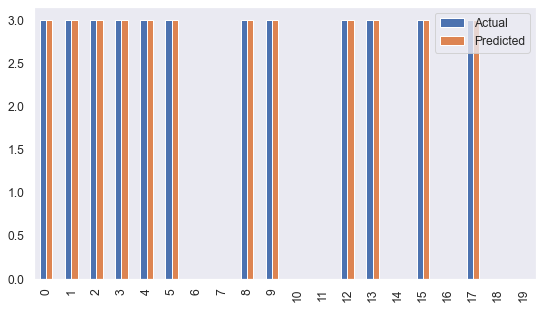

In [93]:
#first20pred
df4 = KNNmod.head(20)
df4.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

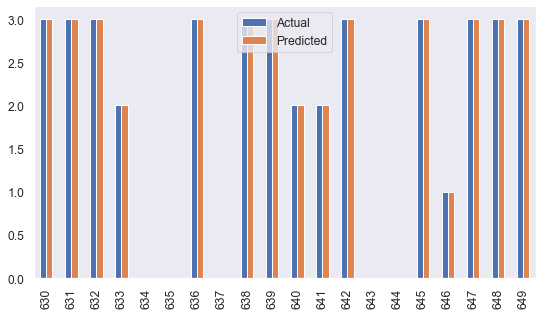

In [94]:
#last20pred
df4 = KNNmod.tail(20)
df4.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [95]:
print(classification_report(y_test, y_pred1, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      0.89      0.94        18
           2       0.96      0.96      0.96       125
           3       0.98      0.99      0.99       304

    accuracy                           0.98       650
   macro avg       0.99      0.96      0.97       650
weighted avg       0.98      0.98      0.98       650



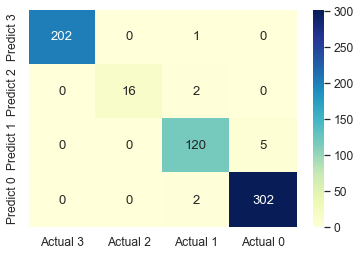

In [96]:
cm = confusion_matrix(y_test, y_pred1)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [97]:
y_pred1 = neigh.predict(X_test)

In [98]:
len(y_pred1)

650

In [99]:
y_pred1

array([3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3,
       3, 2, 0, 3, 3, 2, 0, 2, 2, 2, 3, 3, 0, 0, 2, 3, 3, 0, 2, 3, 2, 3,
       3, 3, 0, 3, 2, 3, 0, 2, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 2, 0, 0, 0,
       0, 3, 0, 0, 2, 3, 3, 3, 2, 3, 0, 2, 3, 2, 2, 0, 2, 3, 2, 3, 3, 0,
       0, 0, 3, 3, 3, 0, 0, 3, 2, 0, 3, 3, 0, 0, 0, 3, 0, 2, 0, 0, 3, 3,
       0, 1, 3, 0, 0, 2, 2, 3, 3, 0, 0, 0, 0, 3, 0, 2, 3, 3, 0, 0, 3, 0,
       0, 0, 3, 3, 2, 3, 0, 3, 2, 3, 2, 0, 3, 3, 3, 2, 2, 0, 2, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 0,
       3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 0, 3, 3, 3, 2,
       3, 0, 3, 0, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 0, 3, 2, 3,
       0, 3, 0, 1, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 2, 0, 3, 3, 3,
       0, 3, 3, 0, 3, 0, 3, 1, 3, 3, 3, 0, 3, 0, 2, 3, 0, 2, 3, 0, 3, 3,
       3, 0, 2, 0, 2, 3, 0, 3, 0, 3, 2, 2, 0, 0, 0, 2, 3, 3, 3, 0, 0, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 1, 2,

In [100]:
y_prob_pred = neigh.predict_proba(X_test)

In [101]:
len(y_prob_pred)

650

In [102]:
y_prob_pred

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [103]:
#AUC ROC Score.
roc_auc_score(y_test, y_prob_pred, multi_class='ovo', average='weighted')

0.9904712421582249

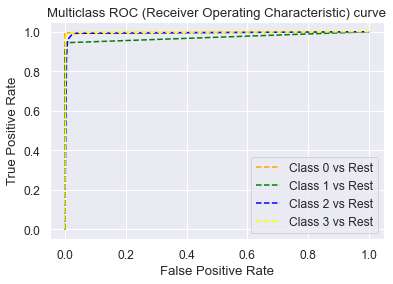

In [104]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

Text(0.5, 1.0, 'Outliers')

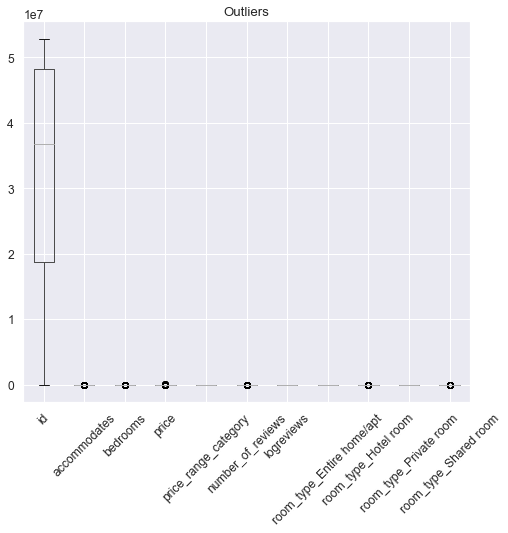

In [105]:
boxplot1 = df3.boxplot(figsize=(8,7),rot=45)
plt.title('Outliers')

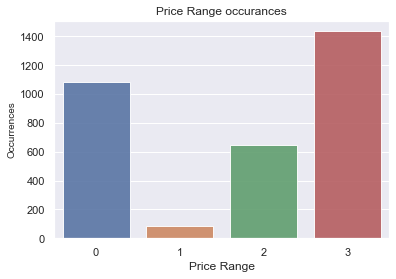

In [106]:
prange_count = df3['price_range_category'].value_counts()
sns.set(style="darkgrid")
sns.barplot(prange_count.index, prange_count.values, alpha=0.9)
plt.title('Price Range occurances')
plt.ylabel('Occurrences', fontsize=10)
plt.xlabel('Price Range', fontsize=12)
plt.show()

#  Naive Bayes Classification

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, GridSearchCV 
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred2_train = gnb.predict(X_train)
y_pred2_test = gnb.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,gnb.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,gnb.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 1.0


In [108]:
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2_test.flatten()})
df5

,Actual,Predicted
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
645,3,3
646,1,1
647,3,3
648,3,3


In [109]:
#Accuracy of the model.
accuracy_score(y_test, y_pred2_test)

1.0

In [110]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred2_test)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


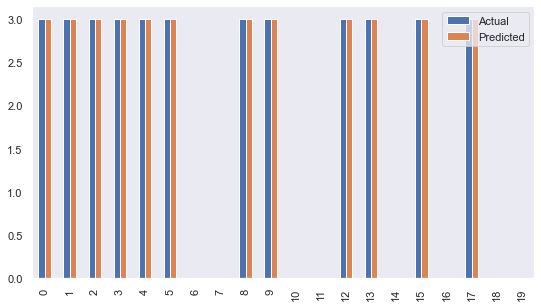

In [111]:
#first20pred
df6 = df5.head(20)
df6.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

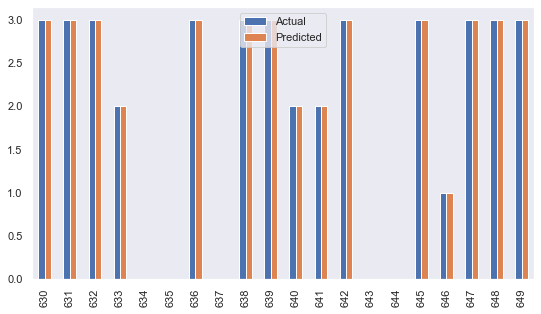

In [112]:
#last20pred
df6 = df5.tail(20)
df6.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [113]:
print(classification_report(y_test, y_pred2_test, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       125
           3       1.00      1.00      1.00       304

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650



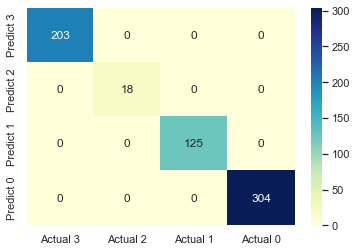

In [114]:
cm = confusion_matrix(y_test, y_pred2_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [115]:
y_pred2_test = gnb.predict(X_test)

In [116]:
len(y_pred2_test)

650

In [117]:
y_pred2_test

array([3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3,
       3, 2, 0, 3, 3, 2, 0, 2, 2, 2, 3, 3, 0, 0, 2, 3, 3, 0, 2, 3, 2, 3,
       3, 3, 0, 3, 2, 3, 0, 2, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 2, 0, 0, 0,
       0, 3, 0, 0, 2, 3, 3, 3, 2, 3, 0, 2, 3, 2, 2, 0, 2, 3, 2, 3, 3, 0,
       0, 0, 3, 3, 3, 0, 0, 3, 2, 0, 3, 3, 0, 0, 0, 3, 0, 2, 0, 0, 3, 3,
       0, 1, 3, 0, 0, 2, 2, 3, 3, 0, 0, 0, 0, 3, 0, 2, 3, 3, 0, 0, 3, 0,
       0, 0, 2, 3, 2, 3, 0, 3, 2, 3, 2, 0, 3, 3, 3, 2, 2, 0, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 0,
       3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 0, 3, 3, 3, 2,
       2, 0, 3, 0, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 0, 3, 2, 3,
       0, 3, 0, 1, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 2, 0, 3, 3, 3,
       0, 3, 3, 0, 3, 0, 3, 1, 3, 3, 3, 0, 3, 0, 2, 3, 0, 2, 3, 0, 3, 3,
       3, 0, 2, 0, 2, 3, 0, 3, 0, 3, 2, 2, 0, 0, 0, 2, 3, 3, 3, 0, 0, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 1, 2,

In [118]:
y_prob_pred1 = gnb.predict_proba(X_test)

In [119]:
y_prob_pred1

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [120]:
len(y_prob_pred1)

650

In [121]:
a = np.array(y_prob_pred1)
b = np.zeros_like(a)
b[np.arange(len(a)), a.argmax(1)] = 1
b

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [122]:
#AUC ROC Score.
roc_auc_score(y_pred2_test, b, multi_class='ovo', average='weighted')

1.0

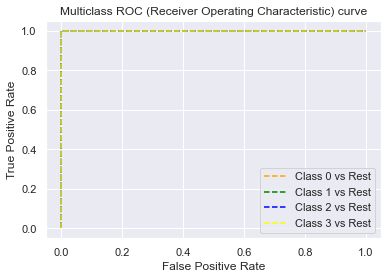

In [123]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred2_test, y_prob_pred1[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

# Random Forest Classification

In [124]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42) 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred3_train = clf.predict(X_train)
y_pred3_test = clf.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,clf.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,clf.predict(X_test)),4)))

Training Accuracy score: 1.0
Testing Accuracy score: 1.0


In [125]:
df7 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3_test.flatten()})
df7

,Actual,Predicted
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
645,3,3
646,1,1
647,3,3
648,3,3


In [126]:
#Accuracy of the model.
accuracy_score(y_test, y_pred3_test)

1.0

In [127]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred3_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred3_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred3_test)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


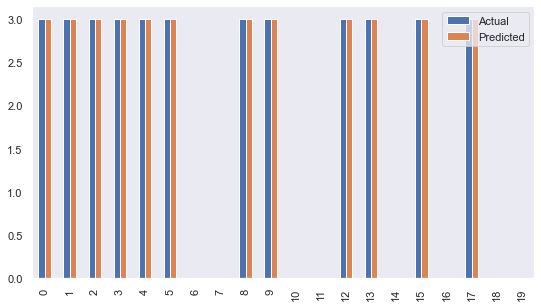

In [128]:
#first20pred
df8 = df7.head(20)
df8.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

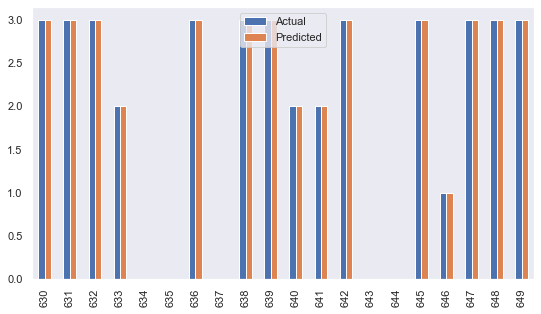

In [129]:
#last20pred
df8 = df7.tail(20)
df8.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [130]:
print(classification_report(y_test, y_pred3_test, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00       125
           3       1.00      1.00      1.00       304

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650



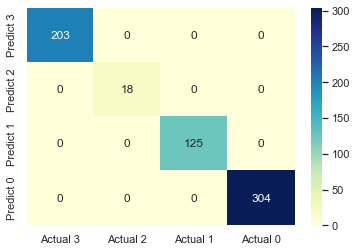

In [131]:
cm = confusion_matrix(y_test, y_pred3_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [132]:
y_pred3_test = clf.predict(X_test)

In [133]:
#AUC ROC Score.
y_prob_pred2 = clf.predict_proba(X_test)
roc_auc_score(y_pred3_test, y_prob_pred2, multi_class='ovo', average='weighted')

1.0

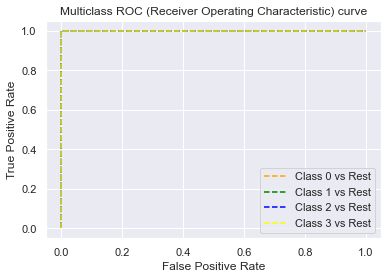

In [134]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred3_test, y_prob_pred2[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

# Decision Tree Classification

In [135]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
X2 = data[['id', 'accommodates', 'bedrooms', 'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
          'room_type_Hotel room', 'room_type_Private room',
          'room_type_Shared room']]
y2 = data['price_range_category']
X_train,X_test,y_train,y_test=train_test_split(X2, y2, test_size=0.20, random_state=42)

In [136]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)
y_pred4 = dt.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))

Training Accuracy score: 0.9996
Testing Accuracy score: 0.6446


In [137]:
Treedata=data[['id', 'accommodates', 'bedrooms', 'price', 'price_range_category',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']]

In [138]:
from sklearn import tree
from sklearn.tree import plot_tree

feature_cols = ['id', 'accommodates', 'bedrooms',
       'number_of_reviews', 'logreviews', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']
X3 = Treedata[feature_cols].values # Features
y3 = Treedata.price_range_category.values # Target variable

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.20,random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scaled,y_train)
y_pred5 = clf.predict(X_test)

In [141]:
print("Accuracy:", accuracy_score(y_test, y_pred5))

Accuracy: 0.2723076923076923


In [142]:
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred5))

Root Mean Squared Error: 3.203076923076923


In [143]:
Treecls = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5.flatten()})
Treecls

,Actual,Predicted
0,3,3
1,3,1
2,3,1
3,3,1
4,3,1
...,...,...
645,3,1
646,1,1
647,3,1
648,3,1


In [144]:
#Accuracy of the model.
accuracy_score(y_test, y_pred5)

0.2723076923076923

In [145]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred5))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred5)))

Mean Absolute Error: 1.4246153846153846
Mean Squared Error: 3.203076923076923
Root Mean Squared Error: 1.789714201507303


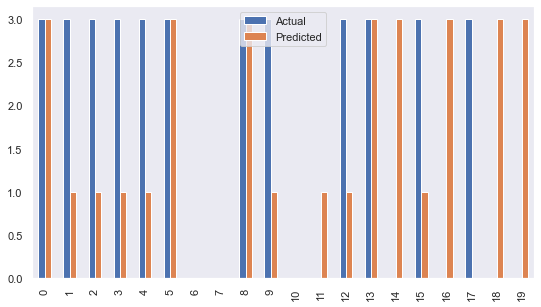

In [146]:
#first20pred
df9 = Treecls.head(20)
df9.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

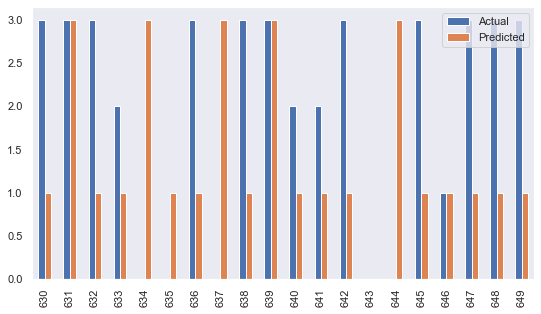

In [147]:
#last20pred
df9 = Treecls.tail(20)
df9.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [148]:
print(classification_report(y_test, y_pred5, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.88      0.31      0.46       203
           1       0.05      0.94      0.09        18
           2       0.00      0.00      0.00       125
           3       0.41      0.32      0.36       304

    accuracy                           0.27       650
   macro avg       0.33      0.39      0.23       650
weighted avg       0.47      0.27      0.31       650



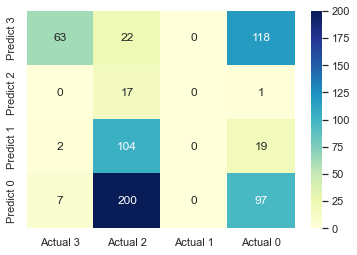

In [149]:
cm = confusion_matrix(y_test, y_pred5)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [150]:
y_pred5 = dt.predict(X_test)

In [151]:
#AUC ROC Score.
y_prob_pred3 = dt.predict_proba(X_test)
roc_auc_score(y_pred5, y_prob_pred3, multi_class='ovo', average='weighted')

1.0

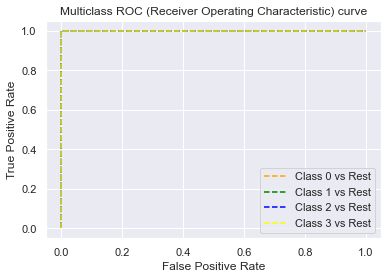

In [152]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred5, y_prob_pred3[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 

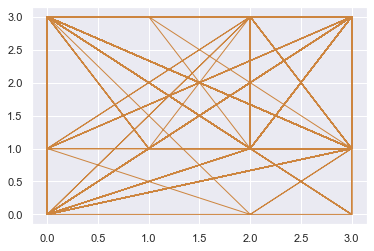

In [153]:
a=Treecls.Actual
b=Treecls.Predicted
plt.plot(a, b, color='peru', linewidth=1)
plt.show()

# Ensembling (Voting Classification)

In [154]:
from sklearn.ensemble import VotingClassifier

classifiers = [('KNN', neigh), ('Random Forest', clf), ('Decision Tree', dt), ('Naive Bayes', gnb)]
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)

print("Training Accuracy score: "+str(round(accuracy_score(y_train,vc.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,vc.predict(X_test)),4)))

Training Accuracy score: 0.9996
Testing Accuracy score: 0.6585


In [155]:
y_pred6 = vc.predict(X_test)

In [156]:
df10 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred6.flatten()})
df10

,Actual,Predicted
0,3,2
1,3,3
2,3,3
3,3,3
4,3,3
...,...,...
645,3,3
646,1,3
647,3,3
648,3,3


In [157]:
#Accuracy of the model.
accuracy_score(y_test, y_pred6)

0.6584615384615384

In [158]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred6))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred6)))

Mean Absolute Error: 0.6307692307692307
Mean Squared Error: 1.4584615384615385
Root Mean Squared Error: 1.2076678096486377


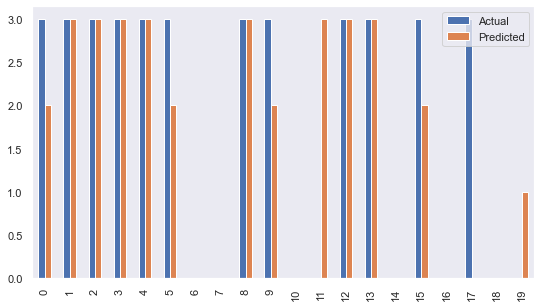

In [159]:
#first20pred
df11 = df10.head(20)
df11.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

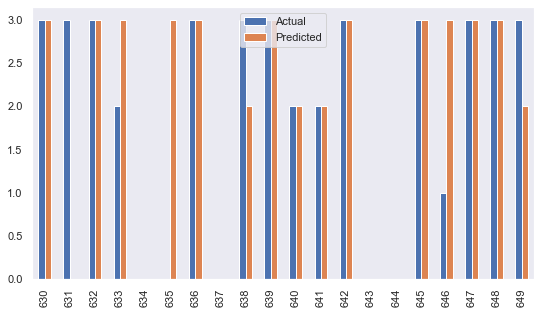

In [160]:
#last20pred
df11 = df10.tail(20)
df11.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [161]:
print(classification_report(y_test, y_pred6, target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       203
           1       0.35      0.33      0.34        18
           2       0.49      0.54      0.51       125
           3       0.67      0.67      0.67       304

    accuracy                           0.66       650
   macro avg       0.57      0.57      0.57       650
weighted avg       0.66      0.66      0.66       650



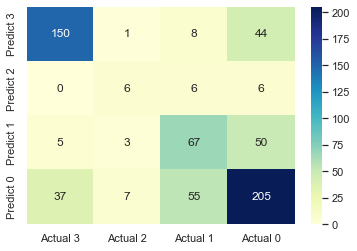

In [162]:
cm = confusion_matrix(y_test, y_pred6)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'], 
                        index=['Predict 3', 'Predict 2', 'Predict 1', 'Predict 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [163]:
#AUC ROC Score.
y_prob_pred3 = dt.predict_proba(X_test)
roc_auc_score(y_pred6, y_prob_pred3, multi_class='ovo', average='weighted')

0.986600176225387

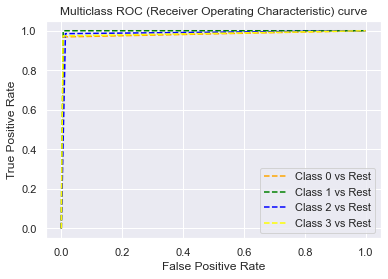

In [164]:
#AUC ROC Curve.
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred6, y_prob_pred3[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC (Receiver Operating Characteristic) curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300) 